In [1]:
!pip install chembl_webresource_client

In [1]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

In [2]:
target = new_client.target
target_query = target.search('Hepatitis')
targets = pd.DataFrame.from_records(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Hepatitis A virus cellular receptor 2,14.0,False,CHEMBL4630879,"[{'accession': 'Q8TDQ0', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Hepatitis A virus cellular receptor 2,14.0,False,CHEMBL4630879,"[{'accession': 'Q8TDQ0', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Hepatitis B virus,Hepatitis B virus,12.0,False,CHEMBL613497,[],ORGANISM,10407
3,[],Hepatitis C virus,Hepatitis C virus,12.0,False,CHEMBL379,[],ORGANISM,11103
4,[],Murine hepatitis virus,Murine hepatitis virus,12.0,False,CHEMBL613733,[],ORGANISM,11138
5,[],Hepatitis A virus,Hepatitis A virus,12.0,False,CHEMBL613753,[],ORGANISM,12092
6,[],Woodchuck hepatitis virus,Woodchuck hepatitis virus,12.0,False,CHEMBL613179,[],ORGANISM,35269
7,"[{'xref_id': 'P26664', 'xref_name': None, 'xre...",Hepatitis C virus genotype 1a (isolate 1) (HCV),Hepatitis C virus polyprotein,10.0,False,CHEMBL4620,"[{'accession': 'P26664', 'component_descriptio...",SINGLE PROTEIN,11104
8,[],Duck hepatitis B virus,Duck hepatitis B virus,10.0,False,CHEMBL613761,[],ORGANISM,12639
9,"[{'xref_id': 'Q15004', 'xref_name': None, 'xre...",Homo sapiens,PCNA-associated factor,10.0,False,CHEMBL5574,"[{'accession': 'Q15004', 'component_descriptio...",SINGLE PROTEIN,9606


In [3]:
selected_target = targets.target_chembl_id[14]
selected_target

'CHEMBL5375'

In [2]:
df_C = pd.read_csv('HCV_NS5B_Curated.csv')
df_C

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,...,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,IC50,=,1.4,nM,8.853872,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,354.37,4.93,75.35,0,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,IC50,=,1.7,nM,8.769551,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1146957,...,Bioorg. Med. Chem. Lett.,2006,16.0,8.0,2205.0,419.54,2.37,107.45,0,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,IC50,=,3.0,nM,8.522879,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,336.38,4.72,75.35,0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,IC50,=,4.8,nM,8.318759,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,335.40,5.51,73.32,1,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,IC50,=,6.0,nM,8.221849,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.0,5.0,1314.0,510.62,6.79,71.77,2,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,IC50,=,139000.0,nM,3.856985,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.0,1.0,119.0,309.36,4.16,68.01,0,Inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,IC50,=,167000.0,nM,3.777284,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1140440,...,J. Med. Chem.,2005,48.0,20.0,6304.0,288.32,2.88,102.83,0,Inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,IC50,=,186000.0,nM,3.730487,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.0,1.0,119.0,244.29,3.04,55.12,0,Inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,IC50,=,360000.0,nM,3.443697,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.0,1.0,119.0,315.33,3.96,68.01,0,Inactive


In [3]:
selection = ['CMPD_CHEMBLID', 'CANONICAL_SMILES', 'STANDARD_VALUE']
df_1 = df_C[selection]
df_1 = df_1[df_1.STANDARD_VALUE.notna()]
df_1.to_csv('notna.csv', index=False)
df_1 = pd.read_csv('notna.csv')
df_1

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0
...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.0
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.0
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.0
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.0


In [4]:
L2 = []
for value in df_1.STANDARD_VALUE.values:
    if float(value) < 1000.0:
        L2.append('Active')
    elif float(value) >10000.0:
        L2.append('Inactive')
    else:
        L2.append('Intermediate')

df_1['bio_class'] = L2
df_2 = df_1
df_2

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,bio_class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0,Active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.0,Inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.0,Inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.0,Inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.0,Inactive


In [5]:
df_2.to_csv('Bioactivity_class.csv', index=False)
df_2

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,bio_class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0,Active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.0,Inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.0,Inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.0,Inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.0,Inactive


In [6]:
norm = []
for value in df_2.STANDARD_VALUE.values:
    if float(value)> 100000000:
        value = 100000000
    mol = (-np.log10(float(value)*(10**-9)))
    norm.append(mol)
df_2['pIC50'] = norm
df_2

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,bio_class,pIC50
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,Active,8.853872
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.7,Active,8.769551
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,Active,8.522879
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,Active,8.318759
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.0,Active,8.221849
...,...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.0,Inactive,3.856985
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.0,Inactive,3.777284
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.0,Inactive,3.730487
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.0,Inactive,3.443697


In [7]:
df_2.to_csv('Bioactivity_class_pIC50.csv')

In [11]:
selection = ['CANONICAL_SMILES', 'CMPD_CHEMBLID']
df_3 = df_2[selection]
df_3.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [12]:
import zipfile
with zipfile.ZipFile("padel.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [13]:
!type molecule.smi

OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4	CHEMBL179256
CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccccc3N2)O)C(C)(C)C	CHEMBL204350
OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4	CHEMBL179257
OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4	CHEMBL178784
CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4)c5ccc(cc15)C(=O)O	CHEMBL369319
CNC(=O)c1c(oc2ccc(c(F)c12)c3cc(cc(F)c3C)C(=O)NC4(COC4)c5ncccn5)c6ccc(F)cc6	CHEMBL3651437
CS(=O)(=O)N1CCN(CC1)C(=O)Cn2c(c3ccc(Cl)cc3)c(C4CCCCC4)c5ccc(cc25)C(=O)O	CHEMBL191196
OC(=O)[C@H](Cc1c[nH]c2ccc(NC(=O)C(=O)O)cc12)NC(=O)c3ccc4c(c3)nc(c5cocc5)n4C6CCCCC6	CHEMBL173466
OC(=O)c1ccc2c(C3CCCCC3)c(c4ccc(Cl)cc4)n(CC(=O)NCC5CC5)c2c1	CHEMBL363199
CNS(=O)(=O)Nc1ccc2N=C(NS(=O)(=O)c2c1)C3=C(O)c4ccccc4N(NC5CCC5)C3=O	CHEMBL210693
COc1ccc(cc1)c2c(C3CCCCC3)c4ccc(cc4n2CC(=O)N5CCC(CC5)N(C)C)C(=O)O	CHEMBL190428
OC(=O)c1ccc2c(C3CCCCC3)c(c4cocc4)n(CC(=O)N5CCC(CC5)N6CCC6)c2c1	CHEMBL362957
CCN(CC)C1CCN(CC1)C(=O)Cn2c(c3ccc(OC)cc3)c(C4CCCCC4)c5ccc(cc25)C(=O)O	CHEMBL190098
CCN(CC)CC1CN(CCO

COc1ccc(CCC2(CC(=O)C(=C(O)O2)Sc3ccc(O)cc3)C4CCCC4)cc1Cl	CHEMBL216044
C[C@@]1(O)[C@H](O)[C@@H](CO)O[C@H]1n2cnc3C(=O)NC(=Nc23)N	CHEMBL418899
CCCC1(CC(=O)O)OCCc2c1sc3c(C)cc(F)c(C#N)c23	CHEMBL200405
OC1=C(C(=O)N(CC2CCCC2)c3ccccc13)C4=NS(=O)(=O)c5ccccc5N4	CHEMBL380442
CCOC(=O)c1cccc(NS(=O)(=O)Nc2ccc3NC(=NS(=O)(=O)c3c2)C4=C(O)c5cccnc5N(CCC(C)C)C4=O)c1	CHEMBL396311
CN(C)C(=O)Cn1c(c2ccncc2)c(C3CCCCC3)c4ccc(cc14)C(=O)O	CHEMBL370542
COc1ccc(CCC2(CC(=O)C(=C(O)O2)Sc3nccn3C)C4CCCC4)cc1Cl	CHEMBL217580
OC(=O)[C@H](Cc1c[nH]c2ccc(O)cc12)NC(=O)c3ccc4c(c3)nc(c5ccccn5)n4C6CCCCC6	CHEMBL367430
OC(=O)c1ccc2c(C3CCCCC3)c4c5ccccc5OCn4c2c1	CHEMBL425286
CCCC1(CC(=O)O)OCCc2c1sc3c(Cl)ccc(Cl)c23	CHEMBL198349
OC(=O)c1nc(nc(O)c1O)c2sccc2NC(=O)OCc3cccc4ccccc34	CHEMBL377504
OC(=O)c1ccc2c(C3CCCCC3)c4c5ccccc5CCn4c2c1	CHEMBL385206
OC(=O)C(=O)\C=C(/O)\c1cccc(NS(=O)(=O)c2cc(Cl)cc(Cl)c2)c1	CHEMBL198813
CC(C)CCN1C(=O)C(=C(O)c2c1cccc2c3ccccc3)C4=NS(=O)(=O)c5ccccc5N4	CHEMBL201604
CC(C)CCN1[C@@H](C(C)C)C(=C(C1=O)C2=NS(=O)(=O)c3cc

In [14]:
! cat molecule.smi | wc -l

578


In [15]:
!cat padel.sh 
!padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [16]:
df_5 = pd.read_csv('descriptors_output.csv')
df_5

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL210693,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL179257,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL179256,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL204350,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL178784,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,CHEMBL369640,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,CHEMBL426244,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,CHEMBL182741,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,CHEMBL175454,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_5 = df_5.drop(columns='Name')
df_5

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
574,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_6 = pd.concat([df_5, df_2.pIC50], axis=1)
df_6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.769551
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.856985
574,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.777284
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.730487
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.443697


In [19]:
df_6.to_csv('tata.csv', index=False)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('tata.csv')
# df = df.fillna(0)
# df = df.dropna()
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)
# df = clean_dataset(df)
# df = df.reset_index().drop(columns='index', axis=1)
# df

df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.853872
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.769551
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.522879
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.318759
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.856985
574,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.777284
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.730487
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.443697


In [2]:
X = df.drop('pIC50', axis=1)
Y = df['pIC50']

In [3]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.feature_selection import VarianceThreshold

In [4]:
def variance_threshold_selector(data, threshold=(0.0015)):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

x = variance_threshold_selector(X) #keeps as dataframe

# selectors = VarianceThreshold(threshold=(.8 * (1-0.8)))
# T = selectors.fit_transform(X) #to array

In [5]:
x

,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,...,PubchemFP828,PubchemFP830,PubchemFP831,PubchemFP833,PubchemFP834,PubchemFP836,PubchemFP838,PubchemFP839,PubchemFP860,PubchemFP863
0,1,1,0,1,1,0,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
574,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
575,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
576,1,0,0,1,1,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [6]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.13)

In [7]:
x_test.shape

(76, 548)

In [8]:
np.any(np.isnan(x_train))

False

In [9]:
import numpy as np

model = RandomForestRegressor(n_estimators=580)
model.fit(x_train, Y_train)
r2 = model.score(x_test, Y_test)
r2

0.7180421937655409

In [496]:
Y_pred = model.predict(x_test)

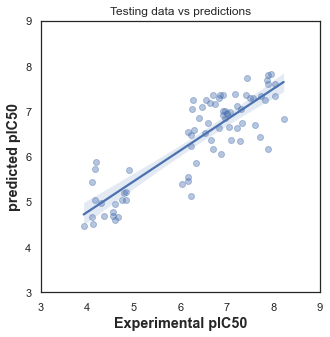

In [497]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3,9)
ax.set_ylim(3,9)
ax.set_title('Testing data vs predictions')
ax.figure.set_size_inches(5, 5)
plt.show()

In [526]:
import tensorflow as tf
from tensorflow.keras import models, layers
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=([548])))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(loss='mean_absolute_error',
            optimizer=tf.keras.optimizers.Adam(0.00005))
model.build()

In [527]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                35136     
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 39,361
Trainable params: 39,361
Non-trainable params: 0
_________________________________________________________________


In [528]:
history = model.fit(
    x_train,
    Y_train,
    validation_data=(x_test, Y_test),
    verbose=0, epochs=600)

In [529]:
history.history['val_loss'][-1]

0.5157057046890259

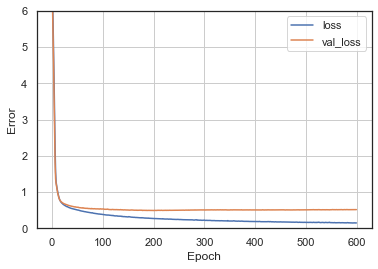

In [530]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 6])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [531]:
test_predictions = model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

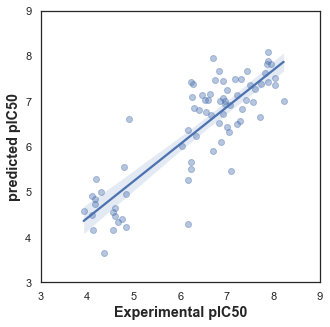

In [532]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y=test_predictions, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3,9)
ax.set_ylim(3,9)
ax.figure.set_size_inches(5, 5)
plt.show

In [536]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)
r_squared(Y_test, test_predictions.reshape(-1))

0.7171228400759164

In [10]:
col_names = []
for cols in x.columns.values:
    col_names.append(cols)

import tensorflow as tf
NUMERIC_COLUMNS = col_names
feature_columns = []

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns)
    
print('\n', feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ahwal\\AppData\\Local\\Temp\\tmp0vljrlq2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}

 [NumericColumn(key='PubchemFP1', shape=(1,),

In [12]:
from IPython.display import clear_output
from pprint import pprint
#this function converts data into tensor datasets, shuffles it and specifies the batch size
index_epoch = {}

def input_func(x, Y, num_epochs=100, shuffle=True, batch_size=32):
    ds = tf.data.Dataset.from_tensor_slices((dict(x), Y))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
    


# train_input_fn = make_input_fn(df_train, y_train)
# test_input_fn = make_input_fn(df_test, y_test, num_epochs=1, shuffle=False)


linear_est.train(input_fn=lambda: input_func(x_train, Y_train)) #train model
result = linear_est.evaluate(input_fn=lambda: input_func(x_test, Y_test, shuffle=False, num_epochs=1))

clear_output()
print(result)

{'average_loss': 0.5585966, 'label/mean': 6.2180033, 'loss': 0.5329934, 'prediction/mean': 6.1439385, 'global_step': 1600}


In [13]:
Y_pred = list(linear_est.predict(input_fn=lambda: input_func(x_test, Y_test, shuffle=False, num_epochs=1)))
S = []

[S.append(el['predictions'][0]) for el in Y_pred]
f = pd.Series(data=S)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ahwal\AppData\Local\Temp\tmp0vljrlq2\model.ckpt-1600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [14]:
import tensorflow as tf 
import tensorflow_addons as tfa
metric = tfa.metrics.r_square.RSquare()
metric.update_state(Y_test, f)
result = metric.result()
result.numpy()

0.64152163

<function matplotlib.pyplot.show(close=None, block=None)>

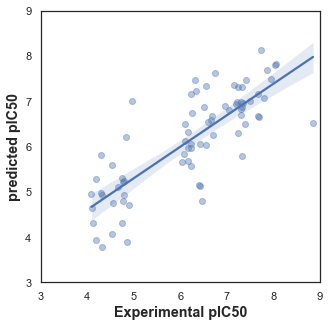

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test,y=f, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(3,9)
ax.set_ylim(3,9)
ax.figure.set_size_inches(5, 5)
plt.show

# Linear regression

In [16]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [17]:
#Cost function
def cost(x, y, w, b, lambda_):
    
    x = np.array(x)
    m = x.shape[0]
    y = np.array(y).reshape(m)
    w = np.array(w).reshape(n)
    
    f_x = np.dot(x, w) + b                #array shape (m,)
    cost = (lambda_/(2*m))*(sum(w**2)) + (sum((f_x - y)**2)) / (2*m)      #scalar
    return cost

def gradient(x, y, w, b, lambda_):
    
    x = np.array(x)
    m = x.shape[0]
    y = np.array(y).reshape(m)
    w = np.array(w).reshape(n)
    
    f_x = np.dot(x, w) + b  #array shape(m,)
    
    d_dw = (w*lambda_/m) +  (np.dot((f_x - y), x) / m)
    d_db = sum(f_x - y) / m
    return d_dw, d_db

def descent(x, y, w_in, b_in, num_itr, lambda_, alpha, cost, gradient):
    
    w = w_in
    b = b_in
    
    cost_history = np.zeros(num_itr)
    w_history = np.zeros([num_itr, n])
    b_history = np.zeros(num_itr)
    
    for i in range(num_itr):
        d_dw, d_db = gradient(x, y, w, b, lambda_)
        
        w = w - alpha * d_dw
        b = b - alpha * d_db
        
        cost_history[i] = cost(x, y, w, b, lambda_)
        b_history[i] = b
        w_history[i] = w
        
        if i%(num_itr/10) == 0:
            print(f'Iteration = {i}, cost = {cost_history[i]}, b = {b_history[i]}')
    return cost_history, w_history, b_history

In [30]:
x = x_train
y = Y_train
n = x.shape[1]
w_in = np.zeros(n)
b_in = 0
alpha = 0.01
num_itr = 9000
lambda_ = 0
cost_history, w_history, b_history = descent(x, y, w_in, b_in, num_itr, lambda_, alpha, cost, gradient)
w_final = w_history[-1]
cost_final = cost_history[-1]
b_final = b_history[-1]

Iteration = 0, cost = 1.4558235188682913, b = 0.06320279630360678
Iteration = 900, cost = 0.1938437008314053, b = 0.17021219919465794
Iteration = 1800, cost = 0.1642222707099859, b = 0.2088931182329299
Iteration = 2700, cost = 0.14973003011607672, b = 0.23549239685379733
Iteration = 3600, cost = 0.14049429172046354, b = 0.25648429001307793
Iteration = 4500, cost = 0.1338526796057559, b = 0.2743373070168181
Iteration = 5400, cost = 0.12875460935469857, b = 0.29020761628525193
Iteration = 6300, cost = 0.12467659130414767, b = 0.3046992908958338
Iteration = 7200, cost = 0.12131711972769728, b = 0.31815600972432123
Iteration = 8100, cost = 0.11848609862492433, b = 0.3307884769422108


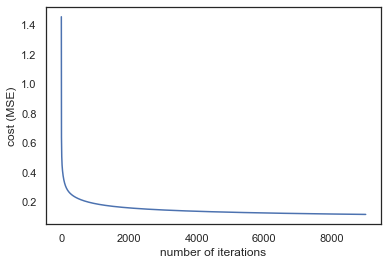

In [31]:

plt.plot(cost_history)
plt.xlabel('number of iterations')
plt.ylabel('cost (MSE)')
plt.show()

In [32]:
x = np.array(x_test)
y_pred = np.dot(x, w_final) + b_final

In [33]:
from scipy.stats import linregress
z = linregress(y_pred, Y_test)
x_line = np.arange(4,9.1)
y_line = x_line * z.slope + z.intercept

In [34]:
def r_squared(y, y_hat):
    y_bar = y.mean()
    ss_tot = ((y-y_bar)**2).sum()
    ss_res = ((y-y_hat)**2).sum()
    return 1 - (ss_res/ss_tot)
r_squared(Y_test, y_pred)

0.7054429304816913

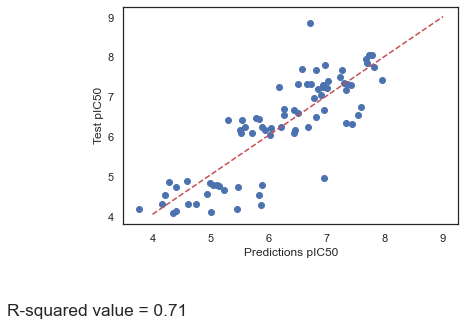

In [35]:
plt.Figure(figsize=(5,5))
plt.scatter(y_pred, Y_test, marker= 'o')
plt.xlabel('Predictions pIC50')
plt.ylabel('Test pIC50')
plt.plot(x_line, y_line, c= 'r', linestyle='dashed')
plt.text(1.5, 1.5, f'R-squared value = {round(r_squared(Y_test, y_pred),2)}', size='x-large')
plt.show()

In [36]:
x = x_train
y = Y_train
n = x.shape[1]
w_in = np.zeros(n)
b_in = 0
alpha = 0.01
num_itr = 7000
r_test_history = []
r_train_history = []
cost_h = []
for i in range(0, 25, 2):
    cost_history, w_history, b_history = descent(x, y, w_in, b_in, num_itr, i, alpha, cost, gradient)
    w_final = w_history[-1]
    cost_final = cost_history[-1]
    b_final = b_history[-1]
    x_test = np.array(x_test)
    y_pred = np.dot(x_test, w_final) + b_final
    r_test_history.append(r_squared(Y_test, y_pred))
    y_pred = np.dot(x_train, w_final) + b_final
    r_train_history.append(r_squared(Y_train, y_pred))
    cost_h.append(cost_final)
    clear_output()
    print(f' lambda {i} done')
r_test_history

 lambda 24 done


[0.70464758835349,
 0.7059391715966011,
 0.7051019567052172,
 0.7029313979570689,
 0.6999565334774107,
 0.6965277240979079,
 0.6928753464109472,
 0.6891491748727061,
 0.6854448766752252,
 0.6818218754793017,
 0.6783154151726232,
 0.6749447142433574,
 0.6717184779583634]

In [439]:
norm_test = r_test_history/r_test_history[-1]
norm_train = r_train_history/r_train_history[0]

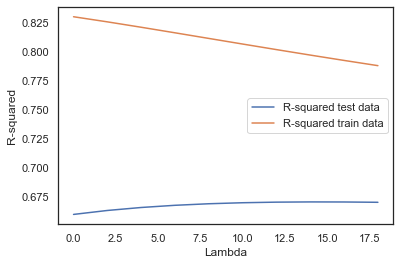

In [440]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 25, 2),r_test_history, label = 'R-squared test data')
plt.plot(range(0, 25, 2),r_train_history, label = 'R-squared train data')

plt.xlabel('Lambda')
plt.ylabel('R-squared')
plt.legend()
plt.show()

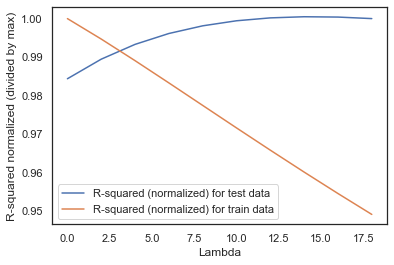

In [442]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 20, 2),norm_test, label = 'R-squared (normalized) for test data')
plt.plot(range(0, 20, 2),norm_train, label = 'R-squared (normalized) for train data')

plt.xlabel('Lambda')
plt.ylabel('R-squared normalized (divided by max)')
plt.legend()
plt.show()

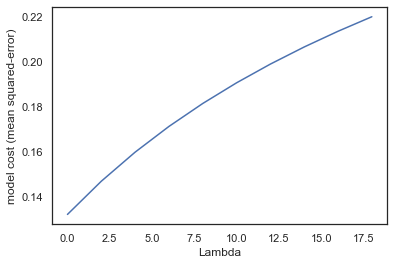

In [443]:
plt.Figure(figsize=(15,20))
plt.plot(range(0, 20, 2), cost_h)
plt.xlabel('Lambda')
plt.ylabel('model cost (mean squared-error)')
plt.show()